# Introduction to CPTAC and Proteomics

This document will take you through the basics of CPTAC and analyzing proteomic data in python. Let's get started!

## Setting up your working directory

Set your working directory to your analysis_data folder.

In [2]:
import os

os.chdir('/Users/amansharma/Desktop/QBIO490/qbio_490_amansharma/analysis_data')

### Start exploring CPTAC with `cptac`
Similar to TCGAbiolinks, we need to load the package and download the data before using.
1. Import the package (`cptac`).
2. Look at the data sets available to us with the list_datasets() function. As a reminder, remember the package_name.method() syntax!
3. Download the cancer you'll be working with. 
4. Load it into our python environment.

In [3]:
# 1. Import cptac
import cptac


# 2. Examine the data sets available with list_datasets()
cptac.list_datasets()

cptac warning: Your version of cptac (1.1.2) is out-of-date. Latest is 1.5.13. Please run 'pip install --upgrade cptac' to update it. (/Users/amansharma/miniforge3/envs/qbio_490_amansharma/lib/python3.9/threading.py, line 917)


,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [4]:
# 3. Download the cancer data set -- fill in dataset!
cptac.download(dataset="Brca")

# 4. Load the cancer data
# ie. brca = cptac.Brca()
brca = cptac.Brca()

Now, we have our object containing a bunch of data. We can use the list_data() function the data available for the cancer dataset.
<br></br>
In addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. using this object. We will focus on the omics which we have already seen for this course; however, other data present in this dataset are also pretty interesting. Finally, many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).
<br></br>
**Exercise 1.1** Call the list_data() function from the object to examine the different data contained in the object. Much like calling functions from a package, we can use the cancer.function() syntax.

* How many patients do you think there are in this dataset? (Make an educated guess about this from the dimensions - we'll confirm your answer later on)

In [5]:
# Run the list_data() function
brca.list_data()

Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	122 rows
	9868 columns
clinical
	122 rows
	18 columns
CNV
	122 rows
	23692 columns
derived_molecular
	122 rows
	36 columns
phosphoproteomics
	122 rows
	38775 columns
proteomics
	122 rows
	10107 columns
somatic_mutation
	24106 rows
	3 columns
transcriptomics
	122 rows
	23121 columns


**Exercise 1.2** Use the get_proteomics() function to store the proteomics data into a new data frame.

In [6]:
protein_data = brca.get_proteomics()
protein_data # view the data


# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!

protein_data.columns = protein_data.columns.get_level_values(0) 


## (2) Exploring the Data

As mentioned earlier, `cptac` data is in the form of `pandas` dataframes. Let's load that and `numpy`. 

**Exercise 2.1** Import numpy and pandas with their usual shortened names (pd and np).

In [7]:
# import packages here
import pandas as pd
import numpy as np

Remember that we can access the rows/column names of a data frame in two ways:
1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.
<br></br>
**Exercise 2.2** Print the axes, index, and columns of the protein_data object. Then, determine its dimensions using the shape attribute. Finally, answer the following questions:

* How many rows and columns are there in the data frame?
* What do the rows and columns represent?
* How many patients are there?
* What about proteins?

In [8]:
## Explore the data frame here and answer questions

numRows, numColumns = protein_data.shape
print(f'Number of Rows: {numRows}')
print(f'Number of Columns: {numColumns}')

print()

print(f'Rows = {protein_data.index.name}')
print("Columns = Proteins")

print()

print(f'NumPatients = {protein_data.shape[0]}')
print(f'NumProteins = {protein_data.shape[1]}')

Number of Rows: 122
Number of Columns: 10107

Rows = Patient_ID
Columns = Proteins

NumPatients = 122
NumProteins = 10107


Remember we can access data by name using `.loc[]` and `.iloc[]`. Since this dataset is really large, we won't really use `.iloc[]` which accesses by index. To get the protein expression information for a specific patient, therefore, we would run something like this: 

In [9]:
# protein_data.loc["patient ID","protein name"] # this is the general case, you have to fill in actual IDs/protein names

**Exercise 2.3** Remember that the numerical data in CPTAC is the relative fold change, not an absolute value/count. Given this, what kind of number would represent lower relative expression? What kind of number would represent higher relative expression? (Hint: reference level is 0) 

In [10]:
## Answer question in comment form here

# I think that negative numbers would represent lower relative expressions while positive numbers represent higher relative expression.

**Exericse 2.4**

Print the relative fold change of 5th patient in the `TP53` protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? (Hint: use .loc[] and remember that a `:` can be used in either the row or column slot to access every row or every column.)


In [11]:
## write code here
print(f"Relative Fold change = {protein_data.iloc[4, protein_data.columns.get_loc('TP53')]}")
print()
print("This means that the patient will have higher levels of TP53 than the reference.")

Relative Fold change = 2.4935

This means that the patient will have higher levels of TP53 than the reference.


### Using Boolean indexing

In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to ifelse(). That is:

   1. The first parameter is the condition (a boolean vector; i.e. Trues and Falses).
   2. The second parameter is the value to fill the True conditions.
   3. The third parameter is the value to fil lthe False conditions.
    
The following example (split into the four code blocks below) shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [12]:
# first let's create our example array

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
number_example_array

,nums
0,0
1,1
2,2
3,3
4,4
5,5


In [13]:
# now, let's make a boolean vector where odds will be True, evens will be False
boolean_vector = (number_example_array % 2 == 1)
boolean_vector

,nums
0,False
1,True
2,False
3,True
4,False
5,True


In [14]:
# then add this vector as a column in our array (we could do this and the above in one step)
number_example_array["boolean_vector"] = boolean_vector
number_example_array

,nums,boolean_vector
0,0,False
1,1,True
2,2,False
3,3,True
4,4,False
5,5,True


In [15]:
# lastly, let's add a third column called "parity" that says based off of "boolean_vector" if our value is odd/even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")
number_example_array

,nums,boolean_vector,parity
0,0,False,Even
1,1,True,Odd
2,2,False,Even
3,3,True,Odd
4,4,False,Even
5,5,True,Odd


**Exercise 2.5** Access the following:

1. Use boolean indexing to access the patient IDs with high (≥1) `TP53` expression. Save this in a pandas DataFrame called `high_TP53`. HINTS:
    * Think about if protein expression information will be contained in a row or a column!
    * Create a boolean mask with the row/column that contains the expression information of `TP53`.
    * Apply the mask to the row/column names that contains the patient IDs.
2. How many patients are there in `high_TP53`? Which axis (columns or rows) represents proteins?
3. Add a column to `high_TP53` that has the values "High"/"Average"/"Low" based on ARF1 expression.
4. How many patients have high expression of both `TP53` and average expression of `ARF1`?

In [16]:
# write code here

high_TP53_mask = protein_data['TP53'] >= 1

high_TP53 = protein_data[high_TP53_mask]

#high_TP53['TP53']

print(f'There are {high_TP53.shape[0]} patients in high_TP53')
print('Columns still represent proteins')

There are 11 patients in high_TP53
Columns still represent proteins


## (3) Additional data in CPTAC

You can also access other data using the `cptac` python package for the same patients, using the corresponding get function.

**Exercise 3.1** Access the RNA (transcriptomics) and clinical data from the object. The function name is very similar in syntax to the get_proteomics() function from before!

In [17]:
rna_data = brca.get_transcriptomics()
clinical_data = brca.get_clinical()
protein_data = brca.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

**Exercise 3.2** Examine these dataframes. In particular:

* What do the values in the rna_data data frame represent?
* Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal?

In [18]:
# explore the data frames using shape, axes, and other functions we've gone over.

print("The values in the rna_data could represent RNA / protein expression.")

print()

print(f'RNA Data Dimensions: {rna_data.shape}')
print(f'Clinical Data Dimensions: {clinical_data.shape}')
print("They are not equal in dimensions, but they are equal in row counts")

The values in the rna_data could represent RNA / protein expression.

RNA Data Dimensions: (122, 23121)
Clinical Data Dimensions: (122, 18)
They are not equal in dimensions, but they are equal in row counts


The dimensions for each dataframe might not be equal depending on if you masked some patients. That's where the `intersect1d()` function from numpy becomes really useful, especially if we want to analyze transcriptomics, proteomics, and clinical data together. This lets us see which patient barcodes are shared between the data frames.


Let's take a look at all of the patients who are older than 50 years old at the time of diagnosis. 
<br></br>
**Exercise 3.3**
1.  Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50.
2.  Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.

In [19]:
# write code here

at_least_50 = (clinical_data['Age.in.Month'] >= 600)
masked_clinical = clinical_data[at_least_50]

Now that we have masked our data, if we tried to do an analysis using the different data frames, we would get a lot of errors since we are now missing some patients in our masked_clinical data frame. If we want to get the patients who are present in the masked data as well as the rna_data and protein_data, we can use intersect1d().

**Exercise 3.4**
1. Use `intersect1d()` from np to create a list that contains the patient IDs for each pair of data frames as mentioned below. (Hint: this function takes two 1d arrays, which would be patient IDs from two different dataframes. How do we get this from each dataframe? Are patient IDs rows or columns?) 
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [20]:
# 1.
name_intersects = [
    np.intersect1d(protein_data.index,rna_data.index), # 0. fill in intersecting for protein/rna here using intersect1d()
    np.intersect1d(protein_data.index,masked_clinical.index), # 1. fill in intersecting for protein/masked clinical here
    np.intersect1d(rna_data.index, masked_clinical.index) # 2. fill in the intersecting for rna/masked clinical here
]

# 2. Print the lengths here
# write a for loop here
for i, intersection in enumerate(name_intersects):
    print(f"The length of intersection {i} is {len(intersection)}")  # fill in here
    
# 3. Which comparison(s) contain the patient names that have all three levels?

print("The comparison of protein+RNA intersection and masked clinical intersection will have all three levels")

The length of intersection 0 is 122
The length of intersection 1 is 82
The length of intersection 2 is 82
The comparison of protein+RNA intersection and masked clinical intersection will have all three levels


## (4) Examining the Clinical Data

Let's explore the clinical data in more detail.

First, use head() to glance as to what data is available.

In [21]:
# write code here
clinical_data.head()

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative


**Exercise 4.1** You might notice that the Age column values don't look like years -- they're in months. Create a new column called "Age" with the "Age.in.Month" values / 12. Then, use head() again to make sure the ages were converted.

In [22]:
# convert ages here!
clinical_data['Age'] = clinical_data['Age.in.Month'] / 12

There may be control (non-cancer) tissue samples in some datasets. Let's determine whether we need to account for this in our dataset this using the unique() function from numpy.

__Exercise 4.2__ Call the unique() function on the Sample_Tumor_Normal column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [23]:
# Get the levels of the Sample_Tumor_Normal column with unique()
uniquevals = clinical_data['Sample_Tumor_Normal'].unique()
uniquevals.sort()
print(uniquevals)

['Tumor']


__Exercise 4.3__ Let's examine how tumor stage varies as a function of age:

   1. Import the plotting libraries matplotlib.pyplot and seaborn (use the standard abbreviations presented last time, seaborn is sns).
   2. Create an age_category column in clinical_data. Define "Young" as under the median age, and "Old" as the median age and older. (Hint: use the where() function from numpy, the equivalent to ifelse()).
   3. The "Stage" information for soome of these patients is NaN (the pandas version of NA). Use the isna() function from pandas and boolean indexing (i.e. where() from numpy again) to remove any patients with NaN values in "Stage".
   4. Using nested for loop and boolean indexing, count the number of old and young patients that have Stage I, Stage II, Stage III, and Stage IV cancer.
   5. Use the skeleton code to draw the barplot. Do your numbers make sense?

Old
Stage IA: 2
Stage IIA: 26
Stage IIB: 6
Stage III: 1
Stage IIIA: 14
Stage IIIB: 2
Stage IIIC: 2
Young
Stage IA: 2
Stage IIA: 24
Stage IIB: 14
Stage III: 3
Stage IIIA: 8
Stage IIIB: 1
Stage IIIC: 2


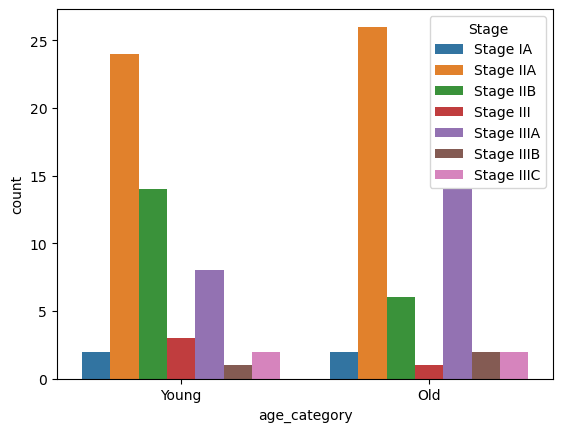

In [36]:
# 1. Import libraries here
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Create the age_category column in clinical_data
median_val = clinical_data['Age'].median()
clinical_data['age_category'] = np.where(clinical_data['Age'] >= median_val, "Old", "Young")
clinical_data['age_category']

# 3. Filter our NaN

clinical_data = clinical_data[~clinical_data['Stage'].isna()]

## this will programatically get all the stages in order
stage_categories = np.unique(clinical_data.loc[:, 'Stage'])
assert(np.all(stage_categories == ['Stage IA', 'Stage IIA', 'Stage IIB',
                                    'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC']))

# 4. Loop through all the stage categories and count

for age_cat in ["Old", "Young"]:
    print(age_cat)
    for stage in stage_categories:
        subset = clinical_data[(clinical_data['age_category'] == age_cat) & (clinical_data['Stage'] == stage)]
        print(f"{stage}: {len(subset)}")


        
# 5. Create a barplot to compare your results
sns.countplot(
    x = "age_category",
    hue = "Stage",
    hue_order = stage_categories,
    data = clinical_data
)

plt.show()

## (5) Plotting Proteomic Data

Let's explore how the proteomic expression of a gene differs between young and old patients.

**Exercise 5.1** Plot the expression data of a chosen protein stratified between patients older and younger than the median age.

In [ ]:
young_mask = FILL IN HERE # look at the columns of the clinical data to see what column to get age information
old_mask = FILL IN HERE

young = (protein_data.loc[FILL IN HERE]).dropna()
old = (protein_data.loc[FILL IN HERE]).dropna()

data = [old.values, young.values] # our boxplot function will require an array (or an array of arrays)
data

In [ ]:
fig, ax = plt.subplots()

plt.axhline(y = 0, color = 'blue', linestyle = '-')
plt.axhline(y = -1, color = 'blue', linestyle = ':')
plt.axhline(y = 1, color = 'blue', linestyle = ':')


bp = ax.boxplot(FILL IN HERE) # data goes here
plt.xticks([1, 2], ["FILL IN HERE", "FILL IN HERE"]) # use \n for new line if desired


plt.show()

**Exercise 5.2** Why do you think we added lines at -1, 0, and 1? What do these values represent in terms of log2FoldChange?

In [ ]:
# answer in a comment here

## (6) SciPy
Another question to ask is if the levels of RNA expression correlate with protein expression. While we would expect for there to be a 1:1 relationship between RNA and protein (according to the central dogma), as you will see, this is not what we oftentimes observe.

In [ ]:
from scipy import stats # we are using the stats package in particular

The first thing we need to do is to identify which patients and genes are shared between the transcriptomic and proteomic data sets.

For some cancer, patients doesn't have clinical or transcriptomic data in CPTAC. We need to use intersect1d() to fix this. We also need to use intersect1d() to determine which genes are shared.

**Exercise 6.1** To make sure the data frames match:

1. Identify patients that are shared between transcriptomic and proteomics data (hint: use intersect1d()). 
2. Identify the names of the genes that are shared between the two datasets (hint: use intersect1d()). Is this data the row or column names?
3. Create the rna_shared and prot_shared data frames; ie dataframes with only genes and patients that are shared between rna and protein data. (Hint: how can we access rows/columns by name?).

In [ ]:
# 1. Identify the patients shared between RNA and protein data.
shared_patients_prot = FILL IN HERE

# 2. Identify the genes (RNA, protein) shared between the two data sets 
shared_rna_prot = FILL IN HERE

# 3. Create the two data frames
rna_shared = FILL IN HERE
prot_shared = FILL IN HERE

Now, we can see how correlated the RNA and protein levels are. We'll use Spearman correlation from the stats library, which is spearmanr().

**Exercise 6.2** Choose a gene and get the Spearman correlation of the rna to protein of that gene.

In [ ]:
# we need the nan_policy="omit" to throw out NaN values
corr, pval = stats.spearmanr(rna_shared["FILL IN HERE"], prot_shared["FILL IN HERE"], nan_policy="omit")

print(f"The correlation of FILL IN HERE is {round(corr, 3)} (p = {round(pval, 10)}).")

**Exercise 6.3** What is your gene's Spearman correlation? What does that mean mathematically? What could this represent biologically? Look into the literature to see if it corroborates this idea.

In [ ]:
# answer in a comment here

## (7) Heatmaps
**Exercise 7.1** A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the heatmap() function from seaborn. Let's do the following:

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call heatmap() -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

In [ ]:
# import seaborn as sns

In [ ]:
ncomparisons = 20 # define this variable in case we want to change the number of correlations to test
                  # this makes it less likely you'll forget to change a number, e.g. in the data frame shape
gene_names = FILL IN HERE # get the first ncomparisons gene names


# Don't worry about this code
# It's good practice to declare your data frame beforehand (it's much faster than appending to a list)
# We fill everything in with 0 just as a placeholder
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

# 2. fill in the data frame!
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        FILL IN HERE

# 3. create the heat map
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.show()

# 4. interpret!

## (8) More with Seaborn
seaborn is a nice package which works well with matplotlib and makes prettier plots with more control over the figure.

Here's how you make a scatter plot with seaborn, for example:

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

plt.show()

**Exercise 8.1** Update the above plot to:

1. Have age in years instead of months.
2. Color patients based on gender (or another clinical variable of your choosing)
3. Have a side-by-side second plot with a different protein of your choosing

In [ ]:
# create plot here

## (9) Saving Plots
Remember, to save a plot, we can call plt.savefig() instead of the plt.show().

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

# age_scatter.png is a relative path so check your working directory before running it
plt.savefig('age_scatter.png', bbox_inches='tight')

# Exercises
Only this section will be graded!
## 1. Drawing Connections
1. Choose a clinical variable and segment the cohort into two groups. 
2. Find out what the 5 most differentially expressed genes are (we aren't going to do this in a sophisticated way like DESeq, instead just take the mean expression of every single gene within a group and find the gene which has the greatest difference in mean between the two groups)
3. Create two scatter plots, side by side, each with one group. Within the scatter plots, plot RNA expression versus protein expression for each of the genes in a different color.
4. Add appropriate legend, title, and labels.

Name
MIR6811    13.636300
RPL41      11.455634
B2M        11.227191
TMSB10     10.839852
MIR6797    10.658400
dtype: float64

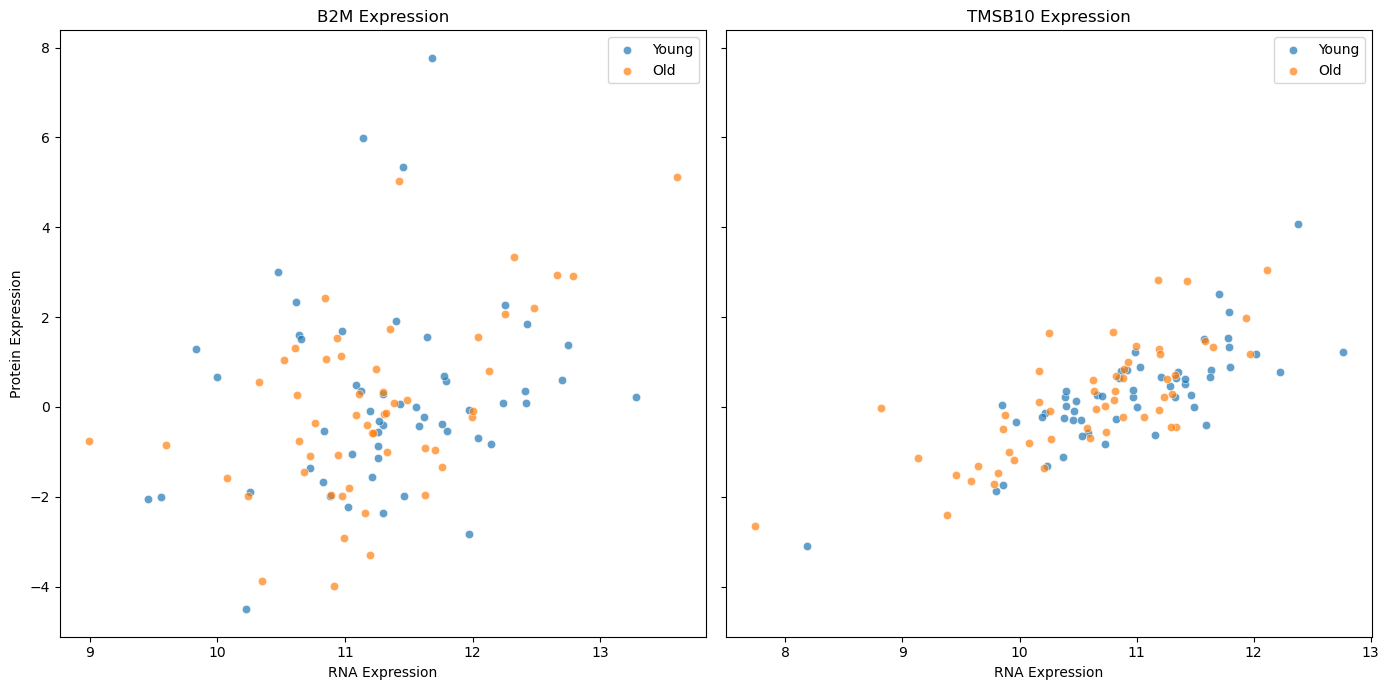

In [108]:
# write code here

# Find top 5 genes

rna_data.columns = rna_data.columns.get_level_values(0) 

# Calculate the mean for each column (gene) in the dataframe
gene_means = rna_data.mean()

# Sort the means in descending order and get the top 5
top_five = gene_means.sort_values(ascending=False).head(5)

# Merge clinical and RNA data on patient ID
merged_data = pd.merge(clinical_data, rna_data, on='Patient_ID')

final_merged_data = pd.merge(merged_data, protein_data, on='Patient_ID')

group_1 = final_merged_data[final_merged_data['age_category'] == 'Young']
group_2 = final_merged_data[final_merged_data['age_category'] == 'Old']

# For some reason, I only found two commonalities between protein and RNA - B2M and TMSB10

top_five_genes = top_five.index.tolist()

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
genes = ['B2M', 'TMSB10']
for i, gene in enumerate(genes):
    rna_col = f'{gene}_x'
    protein_col = f'{gene}_y'
    sns.scatterplot(x=rna_col, y=protein_col, data=group_1, ax=axes[i], label='Young', alpha=0.7)
    sns.scatterplot(x=rna_col, y=protein_col, data=group_2, ax=axes[i], label='Old', alpha=0.7)
    axes[i].set_title(f'{gene} Expression')
    axes[i].set_xlabel('RNA Expression')
    axes[i].set_ylabel('Protein Expression')
    axes[i].legend()
plt.tight_layout()
plt.show()





## 2. Interpretation Skills
This section is short-answer based written responses. Please respond in 2-3 sentences to each question below for full credit.
1. What do the numbers within the protein and transcriptomics DataFrames represent? Why do we represent them this way?
2. Why are there fewer columns in the protein DataFrame than the transcriptomics one?
3. Explain how the central dogma may be broken in between DNA -> RNA -> Proteins and how this might affect our proteomics data.
4. Why is proteomics data relatively scarce compared to sequencing data?
5. Should we ever expect protein expression to be 0 in a tumor sample?
6. What are protein domains and how do they relate to the role of a protein?


In [ ]:
# answer questions here

#1. The numbers within the protein and transcriptomics DataFrames represent relative levels of their expression. They can take upon either positive numbers
# or negative numbers with a baseline value of 0. We represent them in this way because it is easier to quantify and classify their expression as 
# higher or lower than the baseline.

#2. There are fewer columns because not all RNA may be translated into proteins. For example, RNA may stay as miRNA or tRNA rather than become
# mRNA which is translated into proteins. Some proteins may also be hard to detect and analyze.

#3. Processes like alternative splicing, editing, post translational modifications can essentially break
# the central dogma, causing a multitude of proteins to rise from a single gene. Proteins may also be altered
# post translation, having a completely different function than what they are initialized with. This can create
# the discrepancies we see in the data.

#4. Proteomics data is scarce due to technological limitations, complexities, and prices. In fact, proteomics tech-
# nology is generally more complex and expensive than DNA/RNA sequencing technologies.

#5. I think it's definitely possible due to gene silencing or other mutations, or even errors in detection methods. 
# The protein may also be completely missing due to a certain type of cell / condition as well.

#6. Protein domains are essentially "units" within a protein which are responsible for a function / interaction. When 
# domains combine, it can determine a protein's overall roll such as enzymatic activity, structure, signaling, or binding.

## 3. Challenge Exercise - Incorporating Genomics
This exercise is optional and is worth extra credit up to 5 points. The combined extra credit between challenge exercises will cap out at 5 points total.
<br></br>
We can get somatic mutation data for cptac patients the same way we get proteomics, transcriptomical, or clinical. Let's explore some aspects of it.
1. Save the cancer somatic mutation data to `mutation_data`
2. Determine the top 10 most commonly mutated genes within the dataset.
3. Determine what percent of patients have a mutation in at least one of those genes.
4. Create a bar plot that shows percent percent of patients that have exactly 0-10 out of 10 of those mutations. Name axes and titles appropriately.

Index(['Patient_ID', 'Gene', 'Mutation', 'Location'], dtype='object', name='Name')


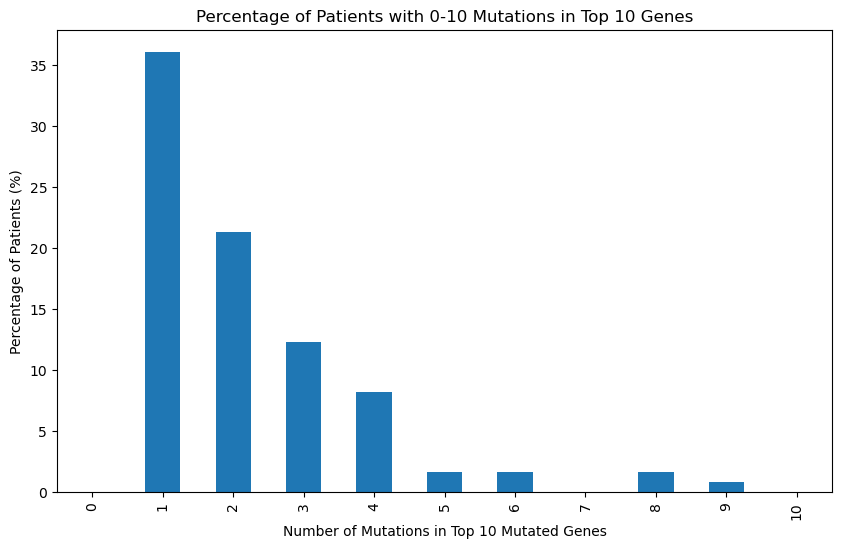

In [128]:
# write code here

mutation_data = brca.get_somatic_mutation()

mutation_data.reset_index(inplace=True)

print(mutation_data.columns)

top_10_mutated_genes = mutation_data['Gene'].value_counts().head(10)

patients_with_top_mutations = mutation_data[mutation_data['Gene'].isin(top_10_mutated_genes.index)]['Patient_ID'].unique()
percent_patients_with_mutation = (len(patients_with_top_mutations) / mutation_data['Patient_ID'].nunique()) * 100

mutation_counts_per_patient = mutation_data[mutation_data['Gene'].isin(top_10_mutated_genes.index)]\
                                .groupby('Patient_ID')['Gene'].size()

mutation_bins = pd.cut(mutation_counts_per_patient, bins=list(range(0, 12)), right=False, include_lowest=True)

mutation_bin_counts = mutation_bins.value_counts().sort_index()

percent_patients_per_bin = (mutation_bin_counts / mutation_data['Patient_ID'].nunique()) * 100

plt.figure(figsize=(10, 6))
percent_patients_per_bin.plot(kind='bar')
plt.xlabel('Number of Mutations in Top 10 Mutated Genes')
plt.ylabel('Percentage of Patients (%)')
plt.title('Percentage of Patients with 0-10 Mutations in Top 10 Genes')
plt.xticks(range(11), labels=[f'{i}' for i in range(11)])  
plt.show()

